**Assignment Part 2**

1. Read data from given csv files, merge it by the “time” column, create a datetime index with the column “time”.
2. Check basic information about the data (e.g. type, size, missing values)
3. Suggest a few ways to get rid of missing values (e.g., delete, replace with another value). 
4. Make plots for all channels in data.
5. Print mean values for grouped data by the hour, month, year. Try other statistical functions.
6. Make plots for the mean values for grouped data by the hour, month, year (from previous point).
7. Create additional column with {0,1} values. 1 if given value from “channel_a” is greater than 250, otherwise 0.
8. Make a plot for “channel_a” data with values greater than 250 marked with different colour. 
9. Write a function that returns data from the date range specified in the function parameters (start_date, end_date). 
10. Write a function that returns the indexes of the points from the given column in Data Frame that are greater than mean + 2 * std. Add a line that marks the boundary for the marked points.
11. Make a plot with the marked points received from the function from the previous task. 
13. Save the data from channel_a to csv. The data in csv should have a frequency of 1h (it is necessary to make aggregation. e.g. mean). The data should also not have a value greater than 250 (replace with an empty value).

In [164]:
### Import basic packages ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Read data from given csv files, merge it by the “time” column, create a datetime index with the column “time”.**

In [165]:
# define pd dataframes

df_a = pd.read_csv("data_a.csv")
df_b = pd.read_csv("data_b.csv")
df_c = pd.read_csv("data_c.csv")

In [166]:
#Merge dataframes with how=outer to keep all rows
df_1 = df_a.merge(df_b, on='time',how='outer',)
df = df_1.merge(df_c, on='time', how='outer')
df

,time,channel_a,channel_b,channel_c
0,2023-02-15T13:50:00,NaN,353.769989,NaN
1,2023-02-15T13:55:00,NaN,353.779999,NaN
2,2023-02-15T14:00:00,NaN,349.609985,NaN
3,2023-02-15T14:05:00,230.210007,355.950012,NaN
4,2023-02-15T14:10:00,224.690002,354.839996,NaN
...,...,...,...,...
80290,2023-11-20T04:20:00,NaN,225.830002,NaN
80291,2023-11-20T04:25:00,NaN,229.000000,NaN
80292,2023-11-20T04:30:00,NaN,221.910004,NaN
80293,2023-11-20T04:35:00,NaN,213.229996,NaN


In [167]:
#Create datetime index

df['time'] = pd.to_datetime(df['time'])


In [168]:
#set 'time' as index

df.set_index('time', inplace=True)

In [169]:
# Visualize results and sort by index
df.index
df = df.sort_index() # 

**--------------------------------------------------------------------------------------**

**2. Check basic information about the data (e.g. type, size, missing values)**

In [170]:
#Descriptive statistics about the data

df.describe()

,channel_a,channel_b,channel_c
count,78505.000000,80265.000000,75561.000000
mean,179.408043,358.319335,191.336273
std,30.439674,63.111887,29.145251
min,100.000000,0.000000,97.589996
25%,160.020004,316.420013,170.559998
50%,182.199997,364.950012,196.360001
75%,198.919998,401.899994,213.679993
max,322.959991,575.570007,303.329987


In [171]:
#Data types

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80295 entries, 2023-02-09 12:35:00 to 2023-11-20 04:35:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   channel_a  78505 non-null  float64
 1   channel_b  80265 non-null  float64
 2   channel_c  75561 non-null  float64
dtypes: float64(3)
memory usage: 2.5 MB


In [172]:
# Check for missing values
print(df.isnull().sum())

channel_a    1790
channel_b      30
channel_c    4734
dtype: int64


In [173]:
# Create a table that displays more information about missing values

#Calculate missing value percentages per channel

dfmissinga = df['channel_a'].isnull().sum()/df['channel_a'].value_counts().sum()*100
dfmissingb = df['channel_b'].isnull().sum()/df['channel_b'].value_counts().sum()*100
dfmissingc = df['channel_c'].isnull().sum()/df['channel_c'].value_counts().sum()*100

# Create a 2D array with the data
data = np.array([
    ['channel_a', df['channel_a'].count(), df['channel_a'].isnull().sum(), dfmissinga],
    ['channel_b', df['channel_b'].count(), df['channel_b'].isnull().sum(), dfmissingb],
    ['channel_c', df['channel_c'].count(), df['channel_c'].isnull().sum(), dfmissingc]
])

# Display the table
dfmissing = pd.DataFrame(data, columns=['Channel','count', 'missing data', 'percent missing'])
dfmissing.columns
dfmissing['percent missing'] = dfmissing['percent missing'].astype(float).round(2)
dfmissing
# dfmissing


,Channel,count,missing data,percent missing
0,channel_a,78505,1790,2.28
1,channel_b,80265,30,0.04
2,channel_c,75561,4734,6.27


**3. Suggest a few ways to get rid of missing values (e.g., delete, replace with another value).**

In [174]:
# There are 3 options to deal with missing values

# 1. Drop rows with missing values
#df = df.dropna()

# 2. We could also try to fill missing values with an inference method. 

# 3. We can leave data as is but we have to be aware that some operations might not work with missing values or we'll have to take it into account in the future


**4. Make plots for all channels in data.**

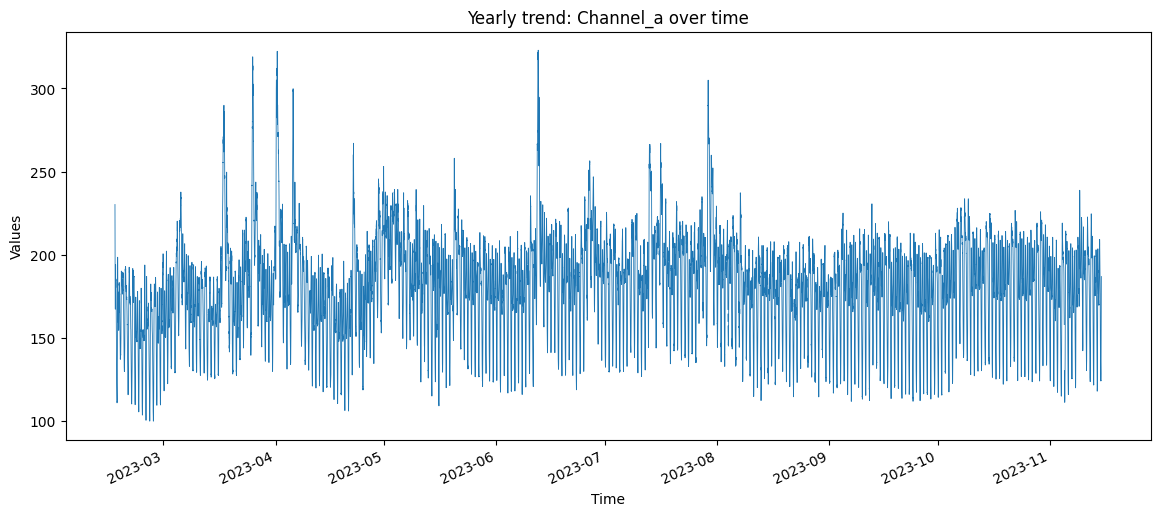

In [175]:
# Visualization of channel_a for the whole time horizon

df['channel_a'].plot(figsize=(14, 6), linewidth=0.6)
plt.xlabel("Time")
plt.ylabel("Values")
plt.xticks(rotation=25)
plt.title("Yearly trend: Channel_a over time")
plt.show()


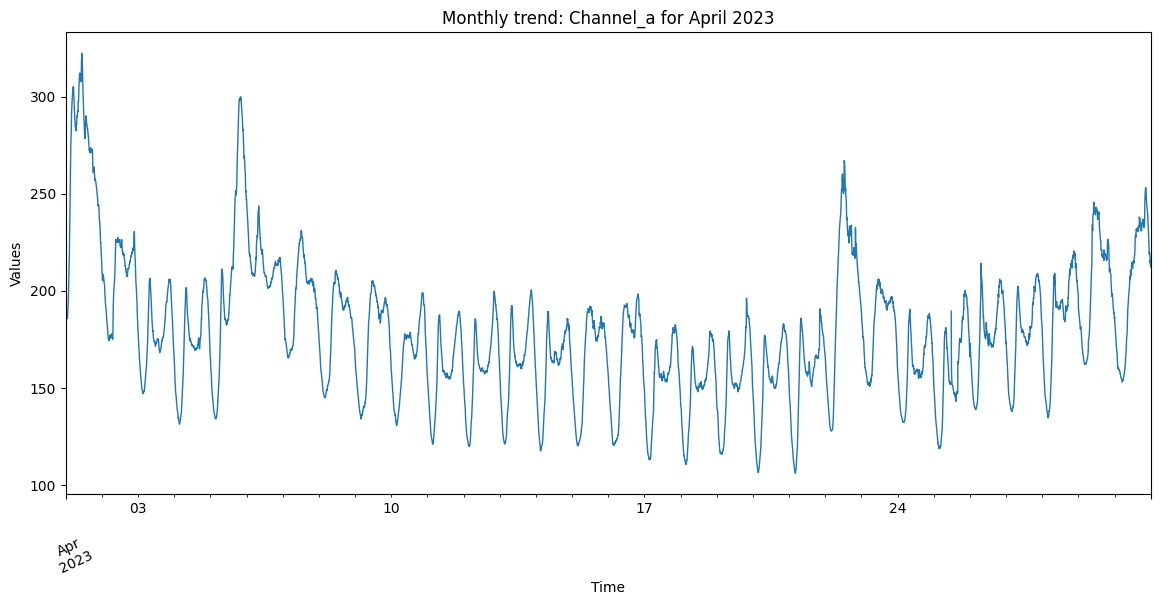

In [176]:
# Monthly trend: Visualization of channel_a for April-2023

df['channel_a'].loc['2023-04'].plot(figsize=(14, 6), linewidth=1)
plt.xlabel("Time")
plt.ylabel("Values")
plt.xticks(rotation=25)
plt.title("Monthly trend: Channel_a for April 2023")
plt.show()


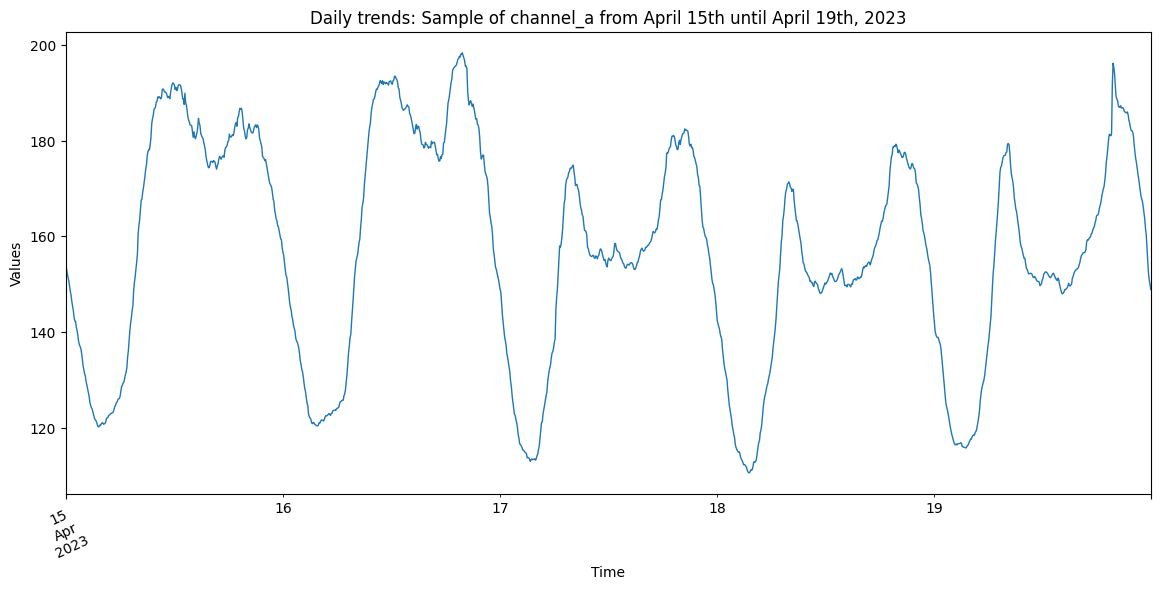

In [177]:
# Visualization of a sample of channel_a from April 15th until April 19th
# I will define a condition that looks for the first available data points for channel_a and plot first 3 days. 
df['channel_a'].loc['2023-04-15':'2023-04-19'].plot(figsize=(14, 6), linewidth=1)
plt.xlabel("Time")
plt.ylabel("Values")
plt.xticks(rotation=25)
plt.title("Daily trends: Sample of channel_a from April 15th until April 19th, 2023")
plt.show()


**--->Repeat previous plots for channel_b and channel c_**

**5. Print mean values for grouped data by the hour, month, year. Try other statistical functions.**

In [178]:
# Mean of Channel_a grouped by year, month, day, and hour
df_cleaned = df.dropna(subset=['channel_a'])

mean_group_y_chana = df_cleaned['channel_a'].groupby(df_cleaned.index.year).mean()
mean_group_m_chana = df_cleaned['channel_a'].groupby(df_cleaned.index.month).mean()
mean_group_d_chana = df_cleaned['channel_a'].groupby(df_cleaned.index.day).mean()
mean_group_h_chana =df_cleaned['channel_a'].groupby(df_cleaned.index.hour).mean()

# Display the result
print(mean_group_y_chana, mean_group_m_chana, mean_group_d_chana, mean_group_h_chana)


time
2023    179.408043
Name: channel_a, dtype: float64 time
2     155.268366
3     177.955931
4     178.605306
5     183.852507
6     185.313404
7     191.553842
8     175.774832
9     172.784686
10    181.469373
11    175.812770
Name: channel_a, dtype: float64 time
1     188.832635
2     178.206871
3     179.987693
4     181.377845
5     185.761477
6     184.348472
7     183.284842
8     177.916589
9     182.608569
10    176.217350
11    172.769356
12    184.558818
13    182.403175
14    176.768661
15    173.629473
16    178.434178
17    183.320860
18    176.327863
19    170.888815
20    175.387276
21    171.977126
22    177.255413
23    175.324333
24    172.903333
25    178.859772
26    183.215104
27    181.632550
28    178.228387
29    185.335438
30    186.550356
31    178.035757
Name: channel_a, dtype: float64 time
0     166.238602
1     151.610506
2     141.311391
3     135.797488
4     134.937784
5     141.903999
6     160.953971
7     183.511881
8     192.455175
9     191.89789

In [179]:
# std of Channel_a grouped by year, month, day, and hour

std_group_y_chana = df_cleaned['channel_a'].groupby(df_cleaned.index.year).std()
std_group_m_chana = df_cleaned['channel_a'].groupby(df_cleaned.index.month).std()
std_group_d_chana = df_cleaned['channel_a'].groupby(df_cleaned.index.day).std()
std_group_h_chana =df_cleaned['channel_a'].groupby(df_cleaned.index.hour).std()

# Display the result
print(std_group_y_chana, std_group_m_chana, std_group_d_chana, std_group_h_chana)



time
2023    30.439674
Name: channel_a, dtype: float64 time
2     24.681381
3     31.261458
4     35.187174
5     27.447445
6     32.117296
7     30.589956
8     23.860643
9     27.844160
10    28.586387
11    28.210855
Name: channel_a, dtype: float64 time
1     40.676398
2     27.635579
3     27.327838
4     28.805368
5     32.626201
6     27.078048
7     26.579404
8     25.793101
9     27.283654
10    25.284372
11    26.965396
12    39.625219
13    32.703657
14    26.500335
15    27.147599
16    31.493643
17    34.217622
18    27.451169
19    25.034433
20    30.614034
21    27.724703
22    31.615731
23    27.149766
24    25.933956
25    37.937906
26    32.575483
27    28.637265
28    26.655414
29    36.884337
30    31.500753
31    24.452601
Name: channel_a, dtype: float64 time
0     17.042893
1     17.550698
2     18.471530
3     19.971304
4     20.734486
5     20.869483
6     22.999830
7     23.824700
8     18.566110
9     19.457551
10    23.247007
11    25.389380
12    25.572718
13

In [180]:
# We could also do Median or Max for example

**6. Make plots for the mean values for grouped data by the hour, month, year (from previous point).**

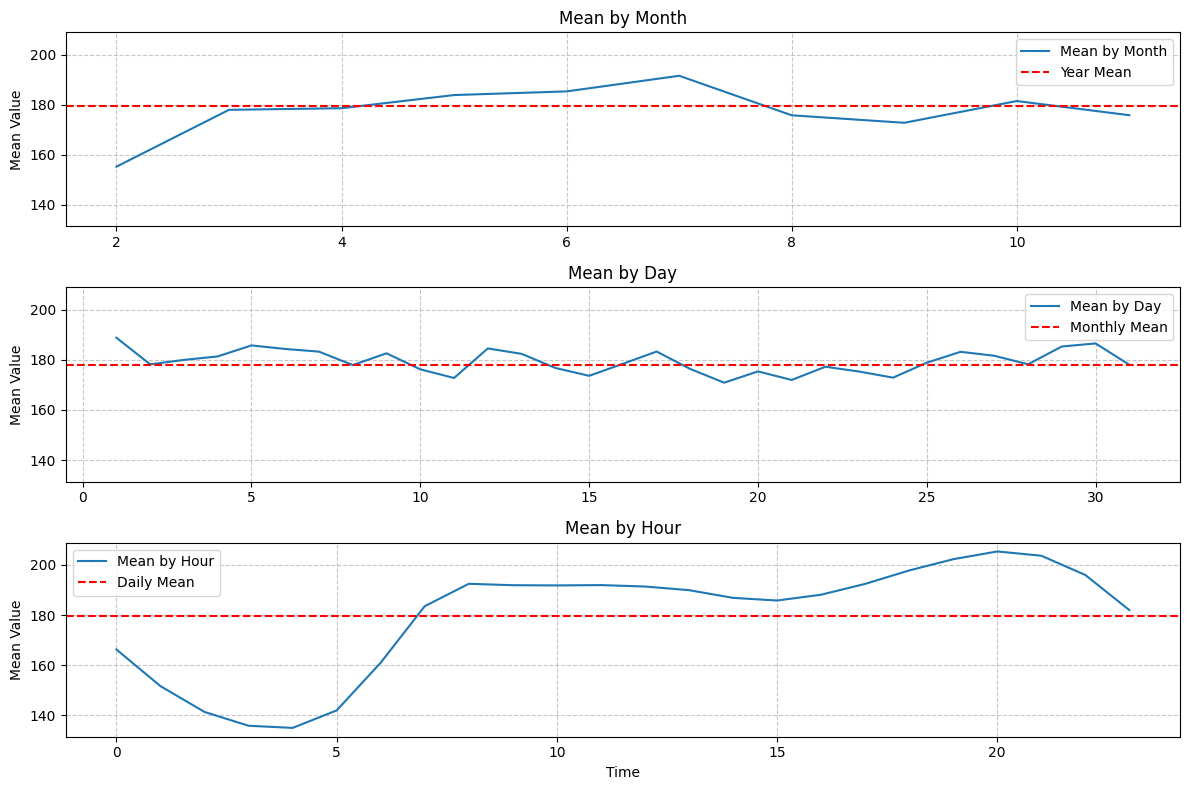

In [181]:
# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharey=True)

# Plot means for month
axes[0].plot(mean_group_m_chana, label='Mean by Month')
axes[0].axhline(mean_group_y_chana.iloc[0], color='red', linestyle='--', label='Year Mean')
axes[0].set_ylabel('Mean Value')
axes[0].set_title('Mean by Month')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot means for day
axes[1].plot(mean_group_d_chana, label='Mean by Day')
axes[1].axhline(mean_group_m_chana.mean(), color='red', linestyle='--', label='Monthly Mean')
axes[1].set_ylabel('Mean Value')
axes[1].set_title('Mean by Day')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.7)

# Plot means for hour
axes[2].plot(mean_group_h_chana, label='Mean by Hour')
axes[2].axhline(mean_group_d_chana.mean(), color='red', linestyle='--', label='Daily Mean')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Mean Value')
axes[2].set_title('Mean by Hour')
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [182]:
# Repeat previous step for other channels
# Could've created a function as well

7. Create additional column with {0,1} values. 1 if given value from “channel_a” is greater than 250, otherwise 0.

In [183]:
df['channel_a_bound'] = (df['channel_a'] > 250).astype(int)

#df[df['channel_a'] > 250][['channel_a', 'channel_a_bound']] #-> to visually confirm results

8. Make a plot for “channel_a” data with values greater than 250 marked with different colour. 

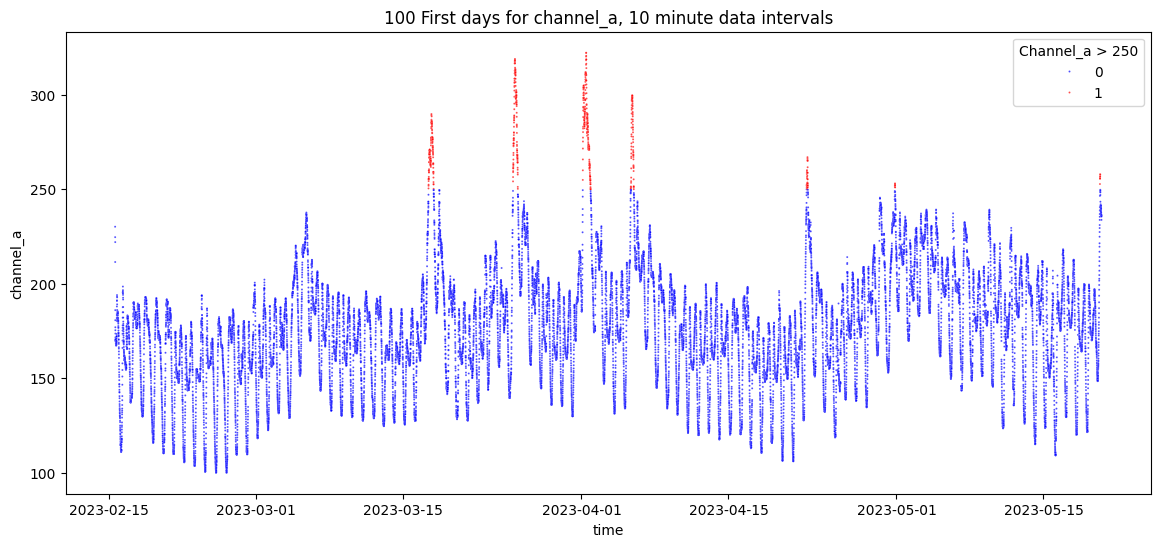

In [184]:
# I used Chat GPT as I was having a hard time finding a simple method on stackoverflow to accomplish this...

# Take a sample of the data
start_date = df.index[0]  
end_date = start_date + pd.Timedelta(days=100) 
df_sample = df.loc[start_date:end_date]

# Set the size of the figure
plt.figure(figsize=(14, 6))

# Plot 'channel_a' with a different color for values greater than 250
sns.scatterplot(x=df_sample.index, y='channel_a', hue='channel_a_bound', data=df_sample, palette={0: 'blue', 1: 'red'}, alpha=0.7, s=2)

plt.legend(title='Channel_a > 250', loc='upper right')
plt.title(label = '100 First days for channel_a, 10 minute data intervals')
plt.show()




9. Write a function that returns data from the date range specified in the function parameters (start_date, end_date). 

In [185]:
def daterange (startdate, enddate):
    return df.loc[startdate:enddate]

daterange('2023-03','2023-05')

,channel_a,channel_b,channel_c,channel_a_bound
time,,,,
2023-03-01 00:00:00,151.869995,338.320007,NaN,0
2023-03-01 00:05:00,151.160004,333.609985,NaN,0
2023-03-01 00:10:00,149.660004,332.350006,NaN,0
2023-03-01 00:15:00,148.630005,328.429993,NaN,0
2023-03-01 00:20:00,147.770004,323.500000,NaN,0
...,...,...,...,...
2023-05-31 23:35:00,176.919998,378.459991,178.710007,0
2023-05-31 23:40:00,174.759995,377.769989,182.160004,0
2023-05-31 23:45:00,173.399994,373.779999,187.529999,0


10. Write a function that returns the indexes of the points from the given column in Data Frame that are greater than mean + 2 * std. 

In [186]:
def outliers (columns_name):
    global channel_mean, channel_std, result_outliers, channel
    channel = columns_name
    channel_mean = df[columns_name].mean()
    channel_std = df[columns_name].std()
    #print(channel_mean, channel_std)
    result_outliers = df[df[columns_name] > (channel_mean + 2 * channel_std)]#.index
    return df[df[columns_name] > (channel_mean + 2 * channel_std)].index

outliers('channel_a')

DatetimeIndex(['2023-03-17 09:50:00', '2023-03-17 09:55:00',
               '2023-03-17 10:00:00', '2023-03-17 10:05:00',
               '2023-03-17 10:10:00', '2023-03-17 10:15:00',
               '2023-03-17 10:20:00', '2023-03-17 10:25:00',
               '2023-03-17 10:30:00', '2023-03-17 10:35:00',
               ...
               '2023-07-30 21:50:00', '2023-07-30 21:55:00',
               '2023-07-30 22:00:00', '2023-07-30 22:05:00',
               '2023-07-30 22:10:00', '2023-07-30 22:15:00',
               '2023-07-30 22:20:00', '2023-07-30 22:25:00',
               '2023-07-30 22:30:00', '2023-07-30 22:35:00'],
              dtype='datetime64[ns]', name='time', length=1704, freq=None)

11. Make a plot with the marked points received from the function from the previous task. Add a line that marks the boundary for the marked points.

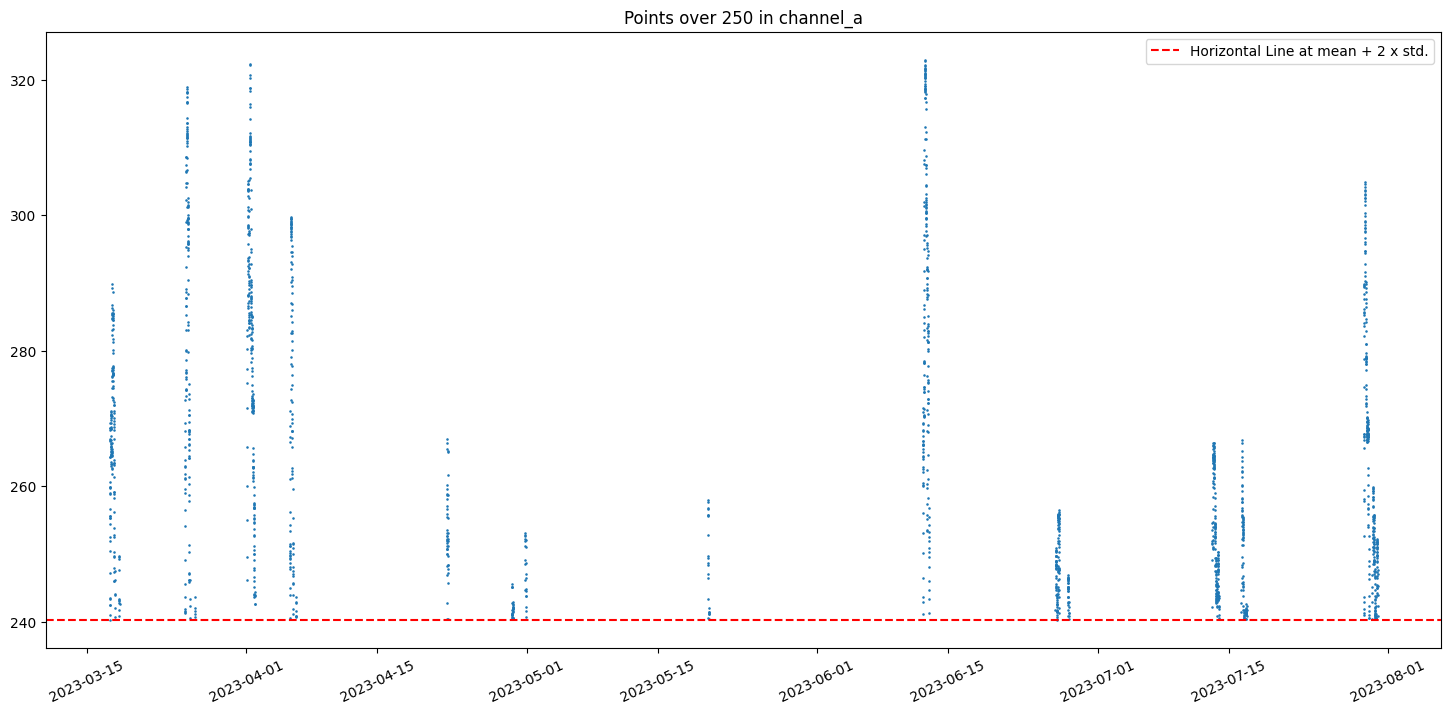

In [198]:
def plot_outliers ():
    plt.figure(figsize=(18,8))
    plt.scatter(result_outliers.index, result_outliers[channel], s=0.7)
    plt.axhline(y=channel_mean+2*channel_std, color='r', linestyle='--', label='Horizontal Line at mean + 2 x std.')
    plt.legend(loc='upper right')
    plt.xticks(rotation=25)
    plt.title(f'Points over in {channel}')
    plt.show()

plot_outliers()

12. Save the data from channel_a to csv. The data in csv should have a frequency of 1h (it is necessary to make aggregation. e.g. mean). The data should also not have a value greater than 250 (replace with an empty value).

In [191]:
df_hour = pd.DataFrame(df['channel_a'].resample("H").mean(), columns=['channel_a'])
df_hour['channel_a_new'] = np.where(df_hour['channel_a'] > 250, np.nan, df_hour['channel_a'])
df_hour = df_hour.drop(columns=['channel_a'])  # or df_hour.drop(columns=['channel_a'], inplace=True)
df_hour
#df_hour.to_csv('channel_a')

,channel_a_new
time,
2023-02-09 12:00:00,NaN
2023-02-09 13:00:00,NaN
2023-02-09 14:00:00,NaN
2023-02-09 15:00:00,NaN
2023-02-09 16:00:00,NaN
...,...
2023-11-20 00:00:00,NaN
2023-11-20 01:00:00,NaN
2023-11-20 02:00:00,NaN
